In [93]:
import numpy as np
import pandas as pd

Data preparation

In [94]:
df = pd.read_csv('datasets/cars.csv')

In [95]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Normalize dataset

In [96]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [97]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [98]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [99]:
df.dtypes[
    df.dtypes == 'object'
]

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [100]:
df.dtypes[
    df.dtypes == 'object'
].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [101]:
strings = list(
    df.dtypes[
        df.dtypes == 'object'
    ].index
)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [102]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [103]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


Exploratory data analysis

In [12]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

Distribution of price

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

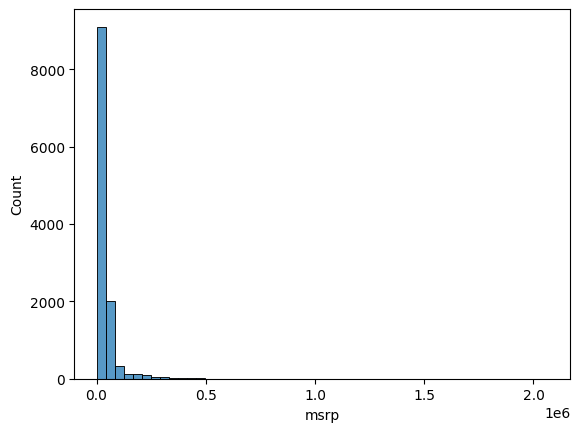

In [14]:
sns.histplot(df.msrp, bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

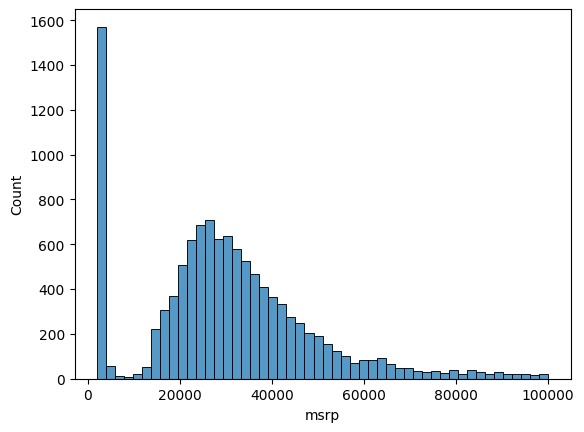

In [15]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

Apply logarithmic distribution

In [16]:
np.log([0+1, 1+1, 10+1, 1000+1, 100000+1])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [17]:
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

In [18]:
price_logs = np.log1p(df.msrp)

In [19]:
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

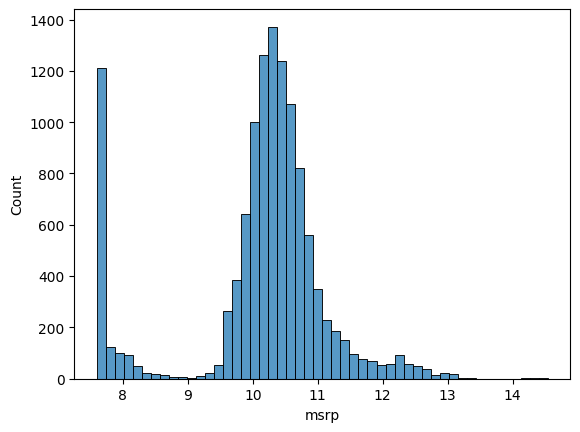

In [20]:
sns.histplot(price_logs, bins=50)

We transformed the tail of the distrubution using logarithmic distribution and now we have a normal distribution

Missing values

In [21]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

Setting up the validation framework (split the data)

In [104]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
#n_train = int(n * 0.6)
n_train = n - n_val - n_test

In [105]:
n, n_val + n_test + n_train

(11914, 11914)

In [106]:
n_val, n_test, n_train

(2382, 2382, 7150)

Suffle the data

In [107]:
df_train = df.iloc[n_train : ]
df_val = df.iloc[n_train : n_train+n_val]
df_test = df.iloc[n_train+n_val : ]

In [108]:
np.random.seed(2) #setting randomness
idx = np.arange(n)
np.random.shuffle(idx)

In [109]:
idx[n_train : ]

array([2779, 3708, 4794, ..., 6637, 2575, 7336])

In [110]:
df_train = df.iloc[idx[ : n_train]]
df_val = df.iloc[idx[n_train : n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val : ]]

In [111]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [112]:
len(df_val), len(df_test), len(df_train)

(2382, 2382, 7150)

In [113]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [114]:
y_train = np.log1p(df_train.msrp).to_numpy()
y_val = np.log1p(df_val.msrp).to_numpy()
y_test = np.log1p(df_test.msrp).to_numpy()

Deleting msrp series

In [115]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [116]:
len(y_train)

7150

Linear regression model

In [35]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [36]:
xi = [453, 11, 86] #engine_hp, city_mpg, popularity, feature vector

In [37]:
# Weights
w0 = 7.17
w = [0.01, 0.04, 0.002]

$g(x_i) = W_0 + \sum_{j=0}^{2}W_j.x_(ij)$

In [38]:
def linear_regression(xi):
    #g(xi) = W0 + W10.xi1 + W2.xi2 + W3.xi3
    n = len(xi)
    pred = w0

    for j in range(n):
        pred += w[j] * xi[j]
    return pred

In [39]:
linear_regression(xi)

12.312

Getting exponents

$\log_{10}(g-1)$

In [40]:
np.expm1(12.312) 

np.float64(222347.2221101062)

In [41]:
np.log1p(222347.2221101062)

np.float64(12.312)

Linear regression vector form

In [42]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for i in range(n):
        res += xi[i] * w[i]

    return res

In [43]:
def linear_regression(xi):
    return w0 + dot(xi, w)

$w$ = [$w_0$, $w_1$, $w_2$, ... $w_n$]

$x_i$ = [$1$, $x_0$, $x_1$, $x_2$, ... $x_n$]

$w^tx_i$ = $x_i^tw$ = $w_0$ +  ...

In [44]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [45]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [46]:
linear_regression(xi)

12.312

$$
{Calculate\space Predictions \space y_p}
$$
$$
X^{m(n+1)} =\begin{bmatrix} 1 & x_{11} & \dots & x_{1n} \\ 1 & x_{21} & ... & x_{2n} \\ 1 & x_{31} & ... & x_{3n} \\ 1 & x_{m1} & ... & x_{mn} \end{bmatrix}
\begin{bmatrix} w_0 \\ w_1 \\ ... \\ w_n \end{bmatrix}
= \begin{bmatrix} X_1^T.w \\ X_2^T.w \\ \vdots \\ X_m^T.w \end{bmatrix}
$$

In [47]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [48]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 24, 1385]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   24, 1385],
       [   1,  453,   11,   86]])

In [49]:
X.dot(w_new)

array([12.38 , 12.22 , 12.312])

In [50]:
def linear_regression(X):
    return X.dot(w_new)

In [51]:
linear_regression(X)

array([12.38 , 12.22 , 12.312])

Training a linear regression model

$$
X_w \cong y
$$
$$
X^{-1} \exists \to X^{-1}X = I
$$
$$
X^{-1}X_w \cong X^{-1}y \to w \cong X^{-1}y
$$
___
$$
\text {Gram matrix}: X^T
$$
$$X^TX_w = X^Ty$$
$$X^TX_w = X^Ty$$
$$(X^TX)^{-1}X^TX_w = (X^TX)^{-1}X^Ty$$
$$I_w = w$$
$$w = (X^TX)^{-1}X^Ty$$

In [119]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [120]:
#ones = np.ones(X.shape[0])
#ones

In [121]:
#X = np.column_stack([ones, X])

In [122]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [123]:
#XTX = X.T@X

In [124]:
#XTX_inv = np.linalg.inv(XTX)

In [125]:
#(XTX@XTX_inv).round(1)

In [126]:
#w_full = (XTX_inv@X.T).dot(y)
#w0 = w_full[0]
#w = w_full[1:]
#w0, w

In [149]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T@X
    XTX_inv = np.linalg.inv(XTX)
    w_full = (XTX_inv@X.T).dot(y)
    # returning tuple, bias term and weights
    return w_full[0], w_full[1:]

In [150]:
# without the ones
train_linear_regression(X, y)

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

Car price baseline model

In [151]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [142]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [155]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

#df_train[base]
X_train = df_train[base].to_numpy()

$$
g(x_i) = w_0 + x_{i1}w_1 + x_{i2}w_2 + \dots
$$
$$
{If \space x_{in} \space is \space missing \space then \space we \space replace \space that \space value \space with \space 0}
$$

In [156]:
#df_train[base].isnull().sum()
X_train = df_train[base].fillna(0).to_numpy() #model would ignore these features

In [157]:
w0, w = train_linear_regression(X_train, y_train)

In [158]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

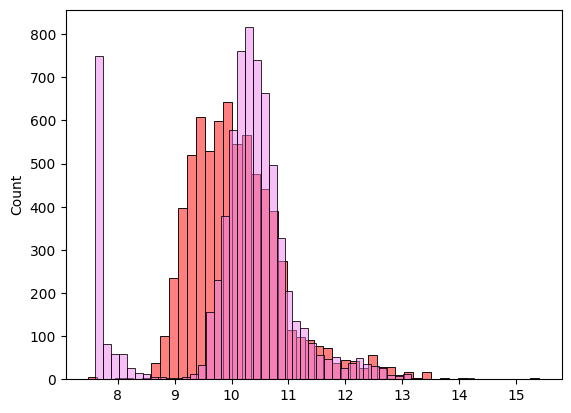

In [159]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='violet', alpha=0.5, bins=50)

Root mean squared error

$$
\sqrt{\frac{I}{m}\sum_{i=1}^m(g(x_i) - y_i)^2}
$$

$$
\text{Predictions - vector target: }g(x_i) - y_i
$$

In [160]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [161]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

Validating the model

In [164]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [167]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.to_numpy()
    return X

In [169]:
# train dataset
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# validate dataset
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.761653099130156)